In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import numpy.linalg as la
import sys

In [2]:
def fastplot(x,y):
    fig, ax = plt.subplots()
    ax.scatter(x,y)
    plt.show()

In [3]:
v1,v2 = 6.,6.3
x1,x2,z1,z2 = 4,7,1,9
def forward_l(zr,x1,x2,z1,z2,right):
    if right:
        a = x1
        b = x2
        x1 = 13-b
        x2 = 13-a
    dx = x2-x1
    if zr<=(x1+z1):
        t = np.sqrt(2)*zr/v1
    elif zr>=(x1+z1) and zr<(x2+z1):
        t = np.sqrt(2)*((x1+z1)/v1+(zr-z1-x1)/v2)
    else:
        t = np.sqrt(2)*((zr-dx)/v1+dx/v2)
    return t

In [4]:
rays = np.arange(2,12)
t_l = [forward_l(r,x1,x2,z1,z2,False) for r in rays]
t_r = [forward_l(r,x1,x2,z1,z2,True) for r in rays]

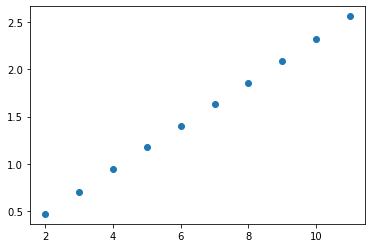

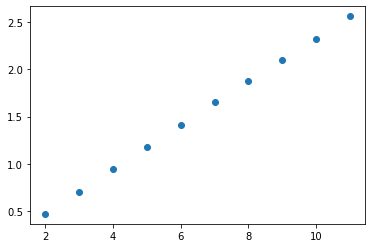

In [5]:
fastplot(rays, t_l)
fastplot(rays, t_r)

Discretization allows us to formulate the problem as:\
$\vec{t} = \mathbf{G}\vec{s}$\
where s is a vector containing the slowness of each square of the 13*11 matrix
slowness on this square grid is numerated in the following way\
[[s0,s1,s2,...,s12],
[s13,s14,...,s25],
...[]...
]\
which is stored in a vector s= [s1,s2,...,s(13*11)]

In [7]:
G = np.zeros((20,13*11))
G[np.arange(10),np.arange(1,11)] = 1
G[np.arange(10,20,1),np.arange(11,1,-1)] = 1
for i in range(10):
    G[np.arange(i,10), np.arange(13*(i+1),11+12*(i+1))] = 1
    G[np.arange(10+i,20,1),np.arange(25+13*i,15+i*14,-1)] = 1
S = np.ones((11,13))/v1 
S[1:9,4:7] = 1/v2
s_sim = np.ndarray.flatten(S) #s_sim contains information about the size of the gray area and is used to simulate the data

<function matplotlib.pyplot.show(close=None, block=None)>

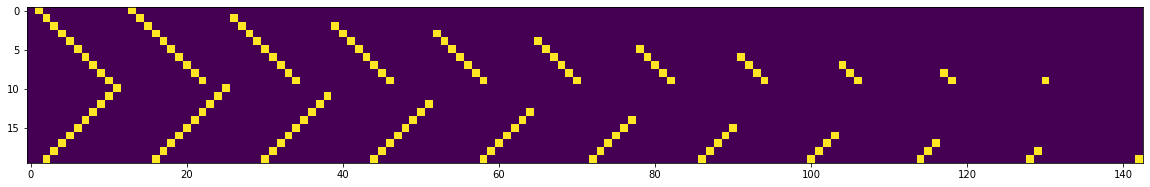

In [11]:
#This is what the matrix looks like
fig, ax = plt.subplots(figsize = (20,10))
ax.imshow(G)
plt.show